In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np
import csv
import msgpack

import tools_refact
from tools_refact import Paragraph, QA, Answer, load_pickled_object
from config import config as c

/media/nazar/DATA/env_dslib_everyday/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [51]:
path_to_data = '/media/nazar/DATA/datasets/SQuAD/dev-v1.1.json'

In [52]:
data = json.load(open(path_to_data, 'r'))

In [53]:
data.keys()

dict_keys(['data', 'version'])

In [54]:
print('data len', len(data['data']))
print(data['data'][0].keys())

data len 48
dict_keys(['paragraphs', 'title'])


In [55]:
data['data'][0]['title']

'Super_Bowl_50'

In [39]:
print(data['data'][0]['paragraphs'][0].keys())
print('context:\n', data['data'][0]['paragraphs'][0]['context'])
print('qas:\n', data['data'][0]['paragraphs'][0]['qas'][2])

dict_keys(['context', 'qas'])
context:
 Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
qas:
 {'answers': [{'text': 'the Main Building', 'answer_start': 279}], 'id': '5733be284776f41900661180', 'question': 'The Basilica of the Sacred heart at Notre Dame is beside to which structure?'}


In [40]:
data['data'][0]['paragraphs'][0]['qas'][0].keys()

dict_keys(['answers', 'id', 'question'])

## JSON STRUCTURE

In [9]:
"""
dict:
    'data':list of dict
        'title': 'Super_Bowl_50'
        'paragraphs':list of dict
            'context': text
            'qas':list of dict
                'question':'Which NFL team represented the AFC at Super Bowl 50?'
                'id':'56be4db0acb8001400a502ec'
                'answers':list of dict   len=3
                    'answer_start':177
                    'text':'Denver Broncos'
    'version'
"""

"\ndict:\n    'data':list of dict\n        'title': 'Super_Bowl_50'\n        'paragraphs':list of dict\n            'context': text\n            'qas':list of dict\n                'question':'Which NFL team represented the AFC at Super Bowl 50?'\n                'id':'56be4db0acb8001400a502ec'\n                'answers':list of dict   len=3\n                    'answer_start':177\n                    'text':'Denver Broncos'\n    'version'\n"

In [56]:
print('Found {} contexts'.format(sum([1 for d in data['data'] for p in d['paragraphs']])))

Found 2067 contexts


In [57]:
print('Found {} questions'.format(sum([1 for d in data['data'] for p in d['paragraphs'] for qa in p['qas']])))

Found 10570 questions


In [58]:
print('Found {} answers'.format(sum([1 for d in data['data'] for p in d['paragraphs'] for qa in p['qas'] for a_ in qa['answers']])))

Found 34726 answers


## Test processed SQuAD

In [4]:
with open('SQuAD/meta.msgpack', 'rb') as f:
    meta = msgpack.load(f, encoding='utf8')

In [5]:
vocab = meta['vocab']

In [10]:
len(vocab)

91187

In [18]:
vocab_tag = meta['vocab_tag']
print(vocab_tag)

['NN', 'IN', 'NNP', 'DT', 'JJ', 'NNS', ',', '.', 'CC', 'VBD', 'RB', 'VBN', 'CD', 'VB', 'VBZ', 'VBG', 'PRP', 'VBP', 'TO', '-RRB-', 'HYPH', '-LRB-', 'PRP$', 'POS', 'WDT', "''", '``', 'MD', 'NNPS', ':', 'JJR', 'JJS', 'WRB', 'WP', 'RP', 'RBR', 'RBS', 'EX', '$', 'SYM', 'FW', 'NFP', 'AFX', 'PDT', 'WP$', 'UH', 'LS', 'SP', 'XX', 'ADD']


In [20]:
vocab_ent = meta['vocab_ent']

In [22]:
vocab_ent

['',
 'ORG',
 'DATE',
 'PERSON',
 'GPE',
 'CARDINAL',
 'NORP',
 'LOC',
 'WORK_OF_ART',
 'PERCENT',
 'EVENT',
 'ORDINAL',
 'MONEY',
 'FAC',
 'QUANTITY',
 'LAW',
 'TIME',
 'LANGUAGE',
 'PRODUCT']

In [23]:
embedding = meta['embedding']

In [26]:
len(embedding[0])

300

In [28]:
with open('SQuAD/data.msgpack', 'rb') as f:
    data = msgpack.load(f, encoding='utf8')

In [29]:
train = data['train']

In [32]:
print('id', train[0][0])

id 5733be284776f41900661182


In [34]:
print('context_id', train[0][1])

context_id [56657, 18, 3, 137, 47, 12, 523, 991, 217, 77428, 3, 5543, 2424, 13, 1663, 10606, 9, 12, 6308, 4781, 5, 3, 3804, 711, 217, 36580, 6, 2094, 5, 3, 5543, 2424, 17, 6353, 50, 18, 9, 12, 753, 4781, 5, 2314, 28, 3053, 62876, 28, 3, 5798, 39, 78972, 15476, 8026, 66905, 39, 217, 22347, 7, 3, 5543, 2424, 9, 3, 4548, 5, 3, 10317, 4877, 217, 36580, 1573, 3, 10501, 9, 3, 22472, 18, 12, 12197, 122, 5, 5235, 17, 9189, 217, 2285, 9, 12, 12081, 5, 3, 71965, 45, 23146, 18, 197, 110, 3, 3804, 711, 44002, 1935, 7, 641, 48147, 48281, 6, 9045, 217, 216, 3, 140, 5, 3, 146, 2042, 916, 17, 6, 12, 1512, 393, 22, 2959, 244, 798, 6594, 17, 3, 4691, 12943, 828, 18, 9, 12, 2731, 18, 205, 2728, 4781, 5, 711, 217]


In [35]:
[vocab[id_] for id_ in train[0][1]]

['Architecturally',
 ',',
 'the',
 'school',
 'has',
 'a',
 'Catholic',
 'character',
 '.',
 'Atop',
 'the',
 'Main',
 'Building',
 "'s",
 'gold',
 'dome',
 'is',
 'a',
 'golden',
 'statue',
 'of',
 'the',
 'Virgin',
 'Mary',
 '.',
 'Immediately',
 'in',
 'front',
 'of',
 'the',
 'Main',
 'Building',
 'and',
 'facing',
 'it',
 ',',
 'is',
 'a',
 'copper',
 'statue',
 'of',
 'Christ',
 'with',
 'arms',
 'upraised',
 'with',
 'the',
 'legend',
 '"',
 'Venite',
 'Ad',
 'Me',
 'Omnes',
 '"',
 '.',
 'Next',
 'to',
 'the',
 'Main',
 'Building',
 'is',
 'the',
 'Basilica',
 'of',
 'the',
 'Sacred',
 'Heart',
 '.',
 'Immediately',
 'behind',
 'the',
 'basilica',
 'is',
 'the',
 'Grotto',
 ',',
 'a',
 'Marian',
 'place',
 'of',
 'prayer',
 'and',
 'reflection',
 '.',
 'It',
 'is',
 'a',
 'replica',
 'of',
 'the',
 'grotto',
 'at',
 'Lourdes',
 ',',
 'France',
 'where',
 'the',
 'Virgin',
 'Mary',
 'reputedly',
 'appeared',
 'to',
 'Saint',
 'Bernadette',
 'Soubirous',
 'in',
 '1858',
 '.',
 'At

In [36]:
print('context_features', train[0][2])

context_features [[False, False, False, 0.007042253521126761], [False, False, False, 0.04225352112676056], [True, True, True, 0.1056338028169014], [False, False, False, 0.007042253521126761], [False, False, False, 0.007042253521126761], [False, False, False, 0.04929577464788732], [False, False, False, 0.007042253521126761], [False, False, False, 0.007042253521126761], [False, False, False, 0.04929577464788732], [False, False, False, 0.007042253521126761], [True, True, True, 0.1056338028169014], [False, False, False, 0.028169014084507043], [False, False, False, 0.02112676056338028], [False, False, False, 0.007042253521126761], [False, False, False, 0.014084507042253521], [False, False, False, 0.014084507042253521], [False, False, False, 0.04225352112676056], [False, False, False, 0.04929577464788732], [False, False, False, 0.007042253521126761], [False, False, False, 0.02112676056338028], [False, False, False, 0.056338028169014086], [True, True, True, 0.1056338028169014], [True, True, T

In [37]:
print('tag_id', train[0][3])

tag_id [10, 6, 3, 0, 14, 3, 4, 0, 7, 1, 3, 2, 2, 23, 0, 0, 14, 3, 4, 0, 1, 3, 2, 2, 7, 10, 1, 0, 1, 3, 2, 2, 8, 15, 16, 6, 14, 3, 0, 0, 1, 2, 1, 5, 4, 1, 3, 0, 26, 2, 2, 16, 2, 25, 7, 10, 1, 3, 2, 2, 14, 3, 2, 1, 3, 2, 2, 7, 10, 1, 3, 0, 14, 3, 2, 6, 3, 2, 0, 1, 0, 8, 0, 7, 16, 14, 3, 0, 1, 3, 0, 1, 2, 6, 2, 32, 3, 2, 2, 10, 9, 1, 2, 2, 2, 1, 12, 7, 1, 3, 0, 1, 3, 4, 0, 21, 8, 1, 3, 4, 0, 24, 14, 1, 12, 5, 8, 3, 2, 2, 19, 6, 14, 3, 4, 6, 4, 0, 0, 1, 2, 7]


In [53]:
len(vocab_tag)

50

In [51]:
[vocab_tag[id_] for id_ in train[0][3]]

['RB',
 ',',
 'DT',
 'NN',
 'VBZ',
 'DT',
 'JJ',
 'NN',
 '.',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'POS',
 'NN',
 'NN',
 'VBZ',
 'DT',
 'JJ',
 'NN',
 'IN',
 'DT',
 'NNP',
 'NNP',
 '.',
 'RB',
 'IN',
 'NN',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'CC',
 'VBG',
 'PRP',
 ',',
 'VBZ',
 'DT',
 'NN',
 'NN',
 'IN',
 'NNP',
 'IN',
 'NNS',
 'JJ',
 'IN',
 'DT',
 'NN',
 '``',
 'NNP',
 'NNP',
 'PRP',
 'NNP',
 "''",
 '.',
 'RB',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'VBZ',
 'DT',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NNP',
 '.',
 'RB',
 'IN',
 'DT',
 'NN',
 'VBZ',
 'DT',
 'NNP',
 ',',
 'DT',
 'NNP',
 'NN',
 'IN',
 'NN',
 'CC',
 'NN',
 '.',
 'PRP',
 'VBZ',
 'DT',
 'NN',
 'IN',
 'DT',
 'NN',
 'IN',
 'NNP',
 ',',
 'NNP',
 'WRB',
 'DT',
 'NNP',
 'NNP',
 'RB',
 'VBD',
 'IN',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'CD',
 '.',
 'IN',
 'DT',
 'NN',
 'IN',
 'DT',
 'JJ',
 'NN',
 '-LRB-',
 'CC',
 'IN',
 'DT',
 'JJ',
 'NN',
 'WDT',
 'VBZ',
 'IN',
 'CD',
 'NNS',
 'CC',
 'DT',
 'NNP',
 'NNP',
 '-RRB-',
 ',',
 'VBZ',
 'DT',
 'JJ',
 ',',
 'JJ',
 'N

In [40]:
print('ent_id', train[0][4])

ent_id [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 13, 13, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 13, 13, 13, 0, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]


In [54]:
len(vocab_ent)

19

In [52]:
[vocab_ent[id_] for id_ in train[0][4]]

['',
 '',
 '',
 '',
 '',
 '',
 'NORP',
 '',
 '',
 '',
 'FAC',
 'FAC',
 'FAC',
 'FAC',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'FAC',
 'FAC',
 'FAC',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'NORP',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'WORK_OF_ART',
 'WORK_OF_ART',
 'WORK_OF_ART',
 'WORK_OF_ART',
 '',
 '',
 '',
 '',
 'FAC',
 'FAC',
 'FAC',
 '',
 '',
 'PERSON',
 '',
 'ORG',
 'ORG',
 'ORG',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'GPE',
 '',
 '',
 'PERSON',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'GPE',
 '',
 'GPE',
 '',
 '',
 '',
 'PERSON',
 '',
 '',
 '',
 'PERSON',
 'PERSON',
 'PERSON',
 '',
 'DATE',
 '',
 '',
 'DATE',
 'DATE',
 'DATE',
 'DATE',
 'DATE',
 'DATE',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'CARDINAL',
 '',
 '',
 '',
 '',
 'PERSON',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'PERSON',
 '']

In [43]:
print('question_id', train[0][5])

question_id [224, 215, 10, 3, 3804, 711, 5858, 627, 6, 9045, 6, 23146, 197, 2]


In [55]:
[vocab[id_] for id_ in train[0][5]]

['To',
 'whom',
 'did',
 'the',
 'Virgin',
 'Mary',
 'allegedly',
 'appear',
 'in',
 '1858',
 'in',
 'Lourdes',
 'France',
 '?']

In [46]:
print('context', train[0][6])

context Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.


In [47]:
print('context_token_span', train[0][7])

context_token_span [[0, 15], [15, 16], [17, 20], [21, 27], [28, 31], [32, 33], [34, 42], [43, 52], [52, 53], [54, 58], [59, 62], [63, 67], [68, 76], [76, 78], [79, 83], [84, 88], [89, 91], [92, 93], [94, 100], [101, 107], [108, 110], [111, 114], [115, 121], [122, 126], [126, 127], [128, 139], [140, 142], [143, 148], [149, 151], [152, 155], [156, 160], [161, 169], [170, 173], [174, 180], [181, 183], [183, 184], [185, 187], [188, 189], [190, 196], [197, 203], [204, 206], [207, 213], [214, 218], [219, 223], [224, 232], [233, 237], [238, 241], [242, 248], [249, 250], [250, 256], [257, 259], [260, 262], [263, 268], [268, 269], [269, 270], [271, 275], [276, 278], [279, 282], [283, 287], [288, 296], [297, 299], [300, 303], [304, 312], [313, 315], [316, 319], [320, 326], [327, 332], [332, 333], [334, 345], [346, 352], [353, 356], [357, 365], [366, 368], [369, 372], [373, 379], [379, 380], [381, 382], [383, 389], [390, 395], [396, 398], [399, 405], [406, 409], [410, 420], [420, 421], [422, 424]

In [49]:
print('answer_start', train[0][8])

answer_start 102


In [50]:
print('answer_end', train[0][9])

answer_end 104


## Len of context in tokens

In [3]:
data = load_pickled_object('SQuAD/train.pkl')

In [4]:
context_lens = [len(p.context_tokens) for p in data]

In [14]:
len(context_lens)

18896

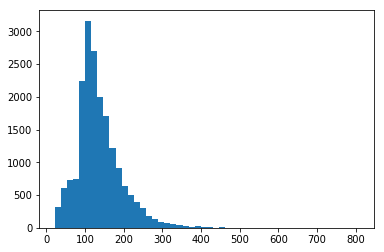

In [7]:
plt.hist(context_lens, bins=50)
plt.show()

## Len of questions in tokens

In [8]:
q_lens = [len(qa.question_tokens) for p in data for qa in p.qas]

In [9]:
len(q_lens)

87599

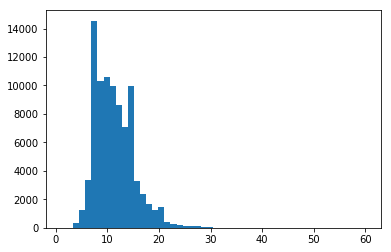

In [10]:
plt.hist(q_lens, bins=50)
plt.show()

## Len of answers in tokens

In [11]:
a_lens = [a.end_token - a.start_token for p in data for qa in p.qas for a in qa.answers]

In [12]:
len(a_lens)

87599

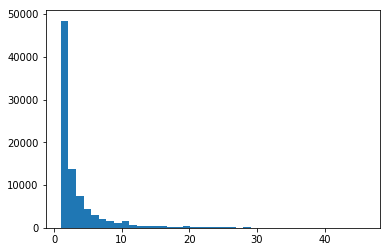

In [67]:
plt.hist(a_lens, bins=40)
plt.show()